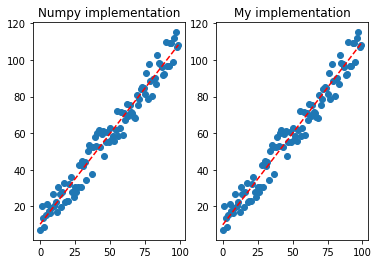

In [30]:
import numpy
from matplotlib import pyplot

"""
n → number of rows in training set
h → hypothesis function
se → square error
cf → cost function
t1, t2 → theta one and two
xs → x values
ys → y values
hxs → h(x) values
"""

    
def get_axes(n, dispersion):
    xs = numpy.arange(n)
    deltas = numpy.random.uniform(0, dispersion, size=[n])
    ys = xs + deltas
    return xs, ys


def plot_axes(xs, ys, hxs, line, title, subplot_i):
    pyplot.subplot(1, 2, subplot_i)
    pyplot.scatter(xs, ys)
    pyplot.plot(xs, hxs, line)
    pyplot.title(title)

    
def numpy_implementation(xs, ys):
    coefficients = numpy.polyfit(xs, ys, deg=1)
    h = numpy.poly1d(coefficients) 
    hxs = h(xs)
    return hxs


def my_implementation(xs, ys, n):
    def h(x, _t1, _t2):
        return _t1 * x + _t2

    def cf(t1, t2):
        return (
            (1 / (2 * n)) 
            * 
            sum(
                [
                    (h(xs[i], t1, t2) - ys[i]) ** 2
                    for i in range(n)
                ]
            )
        )
    
    t1_min = 0
    t2_min = 0
    t1_max = n
    t2_max = n
    t1s = numpy.arange(t1_min, t1_max)
    t2s = numpy.arange(t2_min, t2_max)

    vcf = numpy.vectorize(cf)
    t12s, t21s = numpy.meshgrid(t1s, t2s)
    square_errors = vcf(t12s, t21s)
    
    # I don’t yet know how to do it better ↓
    least_t1 = None
    least_t2 = None
    least_square_error = None
    for t1 in t1s:
        for t2 in t2s:
            square_error = square_errors[t2][t1]
            if least_square_error is None or square_error < least_square_error:
                least_square_error = square_error
                least_t1 = t1
                least_t2 = t2

    #     pyplot.contour(t1s, t2s, square_errors, n)
    #     pyplot.title('My cost function')
    #     pyplot.show()

    return [h(xs[i], least_t1, least_t2) for i in range(n)]


if __name__ == '__main__':
    n = 100
    dispersion = 20

    xs, ys = get_axes(n, dispersion)
    
    numpy_hx = numpy_implementation(xs, ys)
    my_hx = my_implementation(xs, ys, n)

    plot_axes(xs, ys, numpy_hx, '--r', 'Numpy implementation', 1) 
    plot_axes(xs, ys, my_hx, '--r', 'My implementation', 2)
    pyplot.show()

    